In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SUnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'
dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale

dataset = BrainD(dir_img, dir_mask, label_numbers=target_label_numbers)
n_val = int(len(dataset) * val_percent)
n_train = len(dataset) - 2 * n_val
n_test = n_val
train, val, test = random_split(dataset, [n_train, n_val, n_test])

train_loader = DataLoader(train, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val, batch_size=8, shuffle=False, num_workers=8, pin_memory=True, drop_last=True)

writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

INFO: Creating dataset with 7329 examples


In [5]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net3 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=1,
                                                                target_label_numbers=target_label_numbers,
                                                                dataset=dataset,
                                                                train_loader=train_loader,
                                                                val_loader=val_loader,
                                                                writer=writer)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   6597
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  99%|█████████▉| 90/91 [00:09<00:00,  9.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.0798453342292335
Validation round: 100%|██████████| 91/91 [00:09<00:00,  9.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.06946473511365744
Validation round:  77%|███████▋  | 70/91 [00:07<00:01, 12.04batch/s]


Validation round:  98%|█████████▊| 89/91 [00:09<00:00,  9.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.06939271534537221
Validation round: 100%|██████████| 91/91 [00:09<00:00, 10.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.061389696303304736
Validation round:  99%|█████████▉| 90/91 [00:09<00:00,  8.75batch/s]
                                                                    INFO: Validation Dice Loss: 0.05935360188340093
Validation round:  69%|██████▉   | 63/91 [00:05<00:01, 14.83batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.05569078904259336
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 12.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.056116781391940276
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 14.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.05431068492132229
Epoch 1/5:  89%|████████▉ | 5865/6597 [02:15<00:16, 43.31img/s, loss (batch)=0.275] 
INFO: Checkpoint 1 saved !
Validation round:  96%|█████████▌| 87/91 [00:07<00:00, 15.98batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.05541238024994567
Validation round: 100%|██████████| 91/91 [00:07<00:00, 14.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589548039894838
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.0554558154973355
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.0530501514836982
Validation round:  27%|██▋       | 25/91 [00:02<00:10,  6.51batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.05313116524900709
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.16batch/s]
                                                                    INFO: Validation Dice Loss: 0.053177400113462094
Validation round: 100%|██████████| 91/91 [00:07<00:00, 14.91batch/s]
                                                                    INFO: Validation Dice Loss: 0.052397747206818925
Validation round:  57%|█████▋    | 52/91 [00:04<00:03, 12.08batch/s]


Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 16.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.052888319469415225
Epoch 2/5:  89%|████████▉ | 5865/6597 [01:56<00:14, 50.27img/s, loss (batch)=0.257] 
INFO: Checkpoint 2 saved !
Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.052269201357286056
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.04876270366239024
Validation round:  82%|████████▏ | 75/91 [00:06<00:01, 13.15batch/s]


Validation round:  98%|█████████▊| 89/91 [00:06<00:00, 15.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.04876152164005971
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 15.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.04810332564207224
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 12.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.047163467485826095
Validation round: 100%|██████████| 91/91 [00:07<00:00, 14.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.04425375319116718
Validation round:   9%|▉         | 8/91 [00:01<00:43,  1.89batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 16.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.042929213207501635
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 14.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.0430939719080925
Epoch 3/5:  89%|████████▉ | 5865/6597 [01:55<00:14, 50.97img/s, loss (batch)=0.152] 
INFO: Checkpoint 3 saved !
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.042896267968219715
Validation round:  44%|████▍     | 40/91 [00:03<00:03, 15.02batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.0426697143977815
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.042349102651024914
Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.04225138664900602
Validation round:  76%|███████▌  | 69/91 [00:05<00:01, 12.86batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.04267077524583418
Validation round: 100%|██████████| 91/91 [00:07<00:00, 16.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.042826734646991056
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.07batch/s]
                                                                    INFO: Validation Dice Loss: 0.04212333450278083
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.041945614657559235
Epoch 4/5:  89%|████████▉ | 5865/6597 [01:56<00:14, 50.48img/s, loss (batch)=0.136] 
INFO: Checkpoint 4 saved !


Validation round: 100%|██████████| 91/91 [00:07<00:00, 16.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.0421127064542456
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 13.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.04192217201976986
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.04189243863572131
Validation round:  42%|████▏     | 38/91 [00:04<00:06,  7.70batch/s]


Validation round:  98%|█████████▊| 89/91 [00:08<00:00, 14.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.042250714786760096
Validation round: 100%|██████████| 91/91 [00:09<00:00, 12.75batch/s]
                                                                    INFO: Validation Dice Loss: 0.04184686425295505
Validation round: 100%|██████████| 91/91 [00:09<00:00, 13.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.04188493671980533
Validation round:  38%|███▊      | 35/91 [00:04<00:08,  6.61batch/s]


Validation round: 100%|██████████| 91/91 [00:09<00:00, 10.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.041689420876267196
Validation round:  99%|█████████▉| 90/91 [00:09<00:00, 16.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.04172432209764208
Epoch 5/5:  89%|████████▉ | 5865/6597 [02:23<00:17, 40.73img/s, loss (batch)=0.125] 
INFO: Checkpoint 5 saved !


configuring plot three


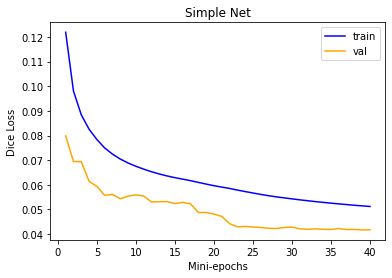

In [6]:
print("configuring plot three")
domain = len(train_scores3)
x_values = [i+1 for i in range(domain)]
plt.title("Simple Net")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")
plt.plot(x_values, train_scores3, color="blue", label="train")
plt.plot(x_values, val_scores3, color="orange", label="val")
plt.legend()
plt.show()
plt.close()